(256, 256, 166)


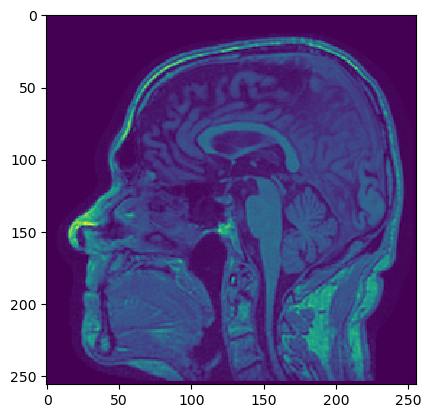

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

adni_file_name = 'adni_dataset/ADNI/002_S_0295/MPR__GradWarp__B1_Correction__N3__Scaled/2006-04-18_08_20_30.0/I45108/ADNI_002_S_0295_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20070319113623975_S13408_I45108.nii'
test_load = nib.load(adni_file_name).get_fdata()
print(test_load.shape)

#this will plot full siz size 
plt.imshow(test_load[:,:,test_load.shape[2]//2])
plt.show()

In [5]:
import os
import shutil

data_map = {}
# Define the root directory containing the subdirectories
root_dir = "../adni_dataset/ADNI"
destination_dir = "../adni_flat_dataset/"

# Ensure the destination directory exists
os.makedirs(destination_dir, exist_ok=True)
all_images = []

# Traverse the directory structure
for dir1 in os.listdir(root_dir):
    dir1_path = os.path.join(root_dir, dir1)
    data_map[dir1] = {}
    
    for dir2 in os.listdir(dir1_path):
        dir2_path = os.path.join(dir1_path, dir2)
        
        if os.path.isdir(dir2_path):  
            for dir3 in os.listdir(dir2_path):  
                dir3_path = os.path.join(dir2_path, dir3)
                # dir3 is date of visit
    
                if os.path.isdir(dir3_path):
                    for dir4 in os.listdir(dir3_path):
                        dir4_path = os.path.join(dir3_path, dir4)
    
                        for file_name in os.listdir(dir4_path):
                            file_path = os.path.join(dir4_path, file_name)
                            file_name = file_name.replace(".nii", f"_{dir3}.nii")
                            new_path = os.path.join(destination_dir, file_name)
                            if dir3 not in data_map[dir1]:
                                data_map[dir1][dir3] = []
                            data_map[dir1][dir3].append(file_name)
    
                            # Copy and rename the file
                            shutil.copy(file_path, new_path)
                            print(f"Copied: {file_path} → {new_path}")

Copied: ../adni_dataset/ADNI/031_S_0867/MPR__GradWarp__N3__Scaled/2006-09-20_18_38_23.0/I67423/ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20070813151048642_S19256_I67423.nii → ../adni_flat_dataset/ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20070813151048642_S19256_I67423_2006-09-20_18_38_23.0.nii
Copied: ../adni_dataset/ADNI/031_S_0867/MPR__GradWarp__N3__Scaled/2007-04-09_13_07_21.0/I60483/ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20070717191100341_S29633_I60483.nii → ../adni_flat_dataset/ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20070717191100341_S29633_I60483_2007-04-09_13_07_21.0.nii
Copied: ../adni_dataset/ADNI/031_S_0867/MPR__GradWarp__N3__Scaled/2007-09-21_13_41_13.0/I79611/ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20071029190736876_S40140_I79611.nii → ../adni_flat_dataset/ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20071029190736876_S40140_I79611_2007-09-21_13_41_13.0.nii
Copied: ../adni_dataset/ADNI/116_S_0361/MPR-R__GradWarp__N3__Scaled/2006-10-

In [6]:
data_map

{'031_S_0867': {'2006-09-20_18_38_23.0': ['ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20070813151048642_S19256_I67423_2006-09-20_18_38_23.0.nii'],
  '2007-04-09_13_07_21.0': ['ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20070717191100341_S29633_I60483_2007-04-09_13_07_21.0.nii'],
  '2007-09-21_13_41_13.0': ['ADNI_031_S_0867_MR_MPR__GradWarp__N3__Scaled_Br_20071029190736876_S40140_I79611_2007-09-21_13_41_13.0.nii']},
 '116_S_0361': {'2006-10-26_13_25_50.0': ['ADNI_116_S_0361_MR_MPR-R__GradWarp__N3__Scaled_Br_20070713085935345_S21220_I59763_2006-10-26_13_25_50.0.nii'],
  '2006-04-27_11_17_10.0': ['ADNI_116_S_0361_MR_MPR__GradWarp__N3__Scaled_Br_20070713084753954_S13809_I59753_2006-04-27_11_17_10.0.nii'],
  '2007-05-10_11_03_44.0': ['ADNI_116_S_0361_MR_MPR__GradWarp__N3__Scaled_Br_20070802213403414_S32277_I64383_2007-05-10_11_03_44.0.nii']},
 '021_S_0141': {'2007-02-22_14_28_28.0': ['ADNI_021_S_0141_MR_MPR__GradWarp__N3__Scaled_Br_20070816112108139_S27046_I67941_2007-02-22_14_28_

In [7]:
# Export the Data Map

import json

with open("adni_subject_file_ma.json", "w") as f:
    json.dump(data_map, f)